In [1]:
%load_ext autoreload
%autoreload 2

import os
from os.path import join
from tqdm import tqdm
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('../../style.mcstyle')
import h5py

In [20]:
from collections import defaultdict
suite= 'quijote'
sim='nbody'
L=1000
N=128
suitepath = f'/home/mattho/git/ltu-cmass/data/{suite}/{sim}/L{L}-N{N}'

c = defaultdict(lambda: [])
for r in tqdm(os.listdir(suitepath)):
    for k in os.listdir(join(suitepath, r)):
        c[k].append(r)
for k, v in c.items():
    print(k.ljust(20), len(v))

 28%|██▊       | 551/2000 [00:00<00:00, 5506.43it/s]

100%|██████████| 2000/2000 [00:00<00:00, 5470.24it/s]

config.yaml          2000
halos.h5             2000
galaxies             16
lightcone            16
summary              1


In [37]:
## FOR REMOVING UNFINISHED SIMS
# import shutil
# for idx in c['rho_transfer.npy']:
#     simpath = join(suitepath, idx)
#     if not os.path.isdir(simpath):
#         continue
#     if 'config.yaml' not in os.listdir(simpath):
#         print('Removing', idx, os.listdir(simpath))
#         # shutil.rmtree(simpath)

In [17]:
lhid=5
' '.join(c['Pk'])

'5'

(384, 384, 384) (384, 384, 384, 3)


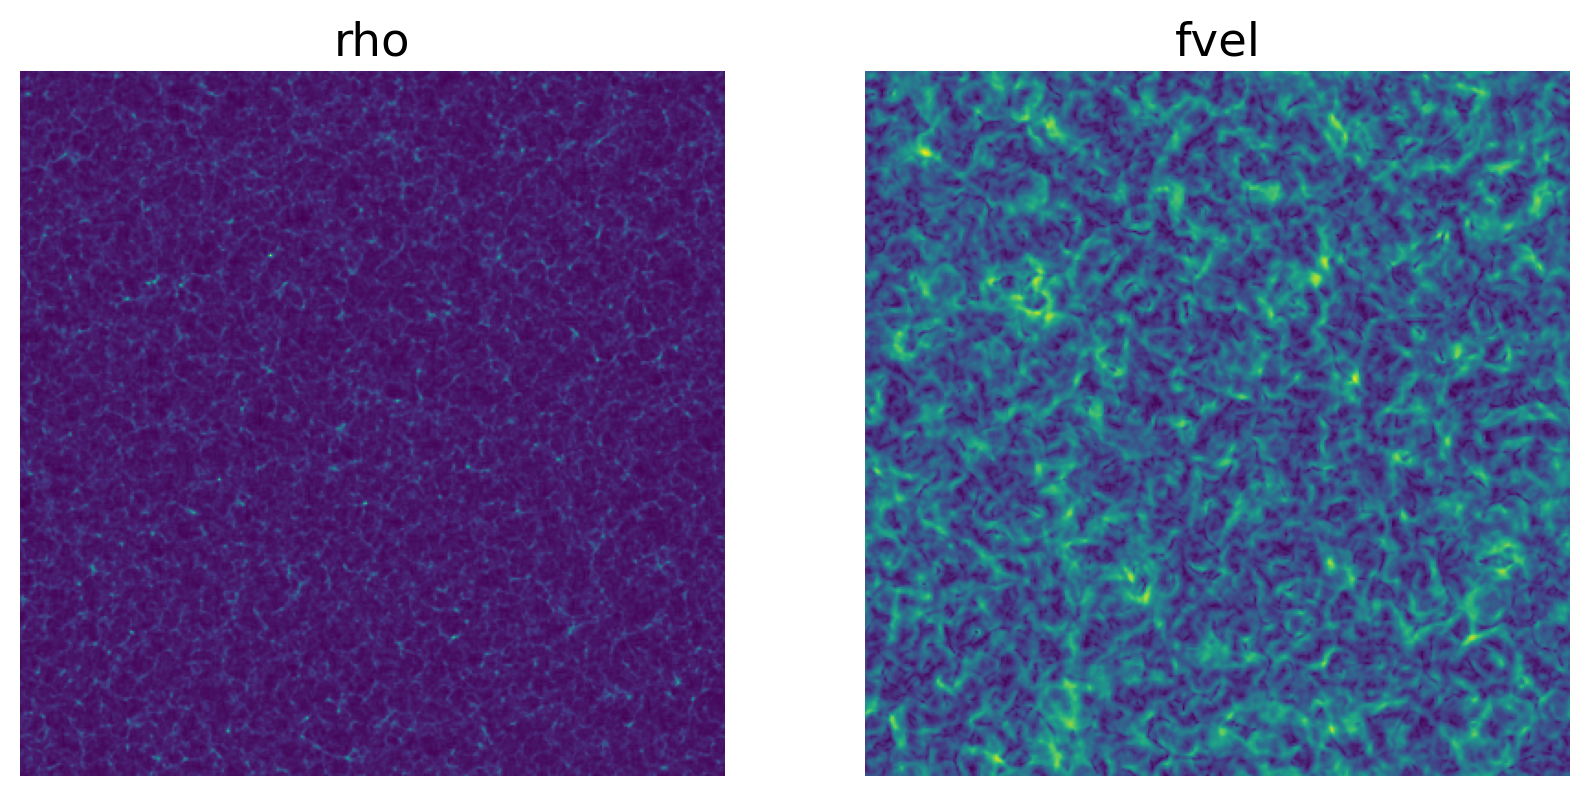

In [9]:
# plot nbody
file = 'nbody.h5'
with h5py.File(join(suitepath, str(lhid), file), 'r') as f:
    a = list(f.keys())[0]
    rho = f[a]['rho'][...]
    fvel = f[a]['fvel'][...]
    print(rho.shape, fvel.shape)

f, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(rho[0, :, :])
axs[0].set_title('rho')
axs[1].imshow(np.linalg.norm(fvel[0, :, :], axis=-1))
axs[1].set_title('fvel')
for ax in axs:
    ax.axis('off')

In [11]:
# # plot bias
# file = 'bias.h5'
# with h5py.File(join(suitepath, str(lhid), file), 'r') as f:
#     a = list(f.keys())[0]
#     medges = f[a]['medges'][...]
#     popt = f[a]['popt'][...]
#     print(medges.shape, popt.shape)
# f, ax = plt.subplots()
# ax.plot((medges[:-1]+medges[1:])/2, popt)
# ax.set(xlabel='m', ylabel='b');

(30249448,) (30249448, 3) (30249448, 3)


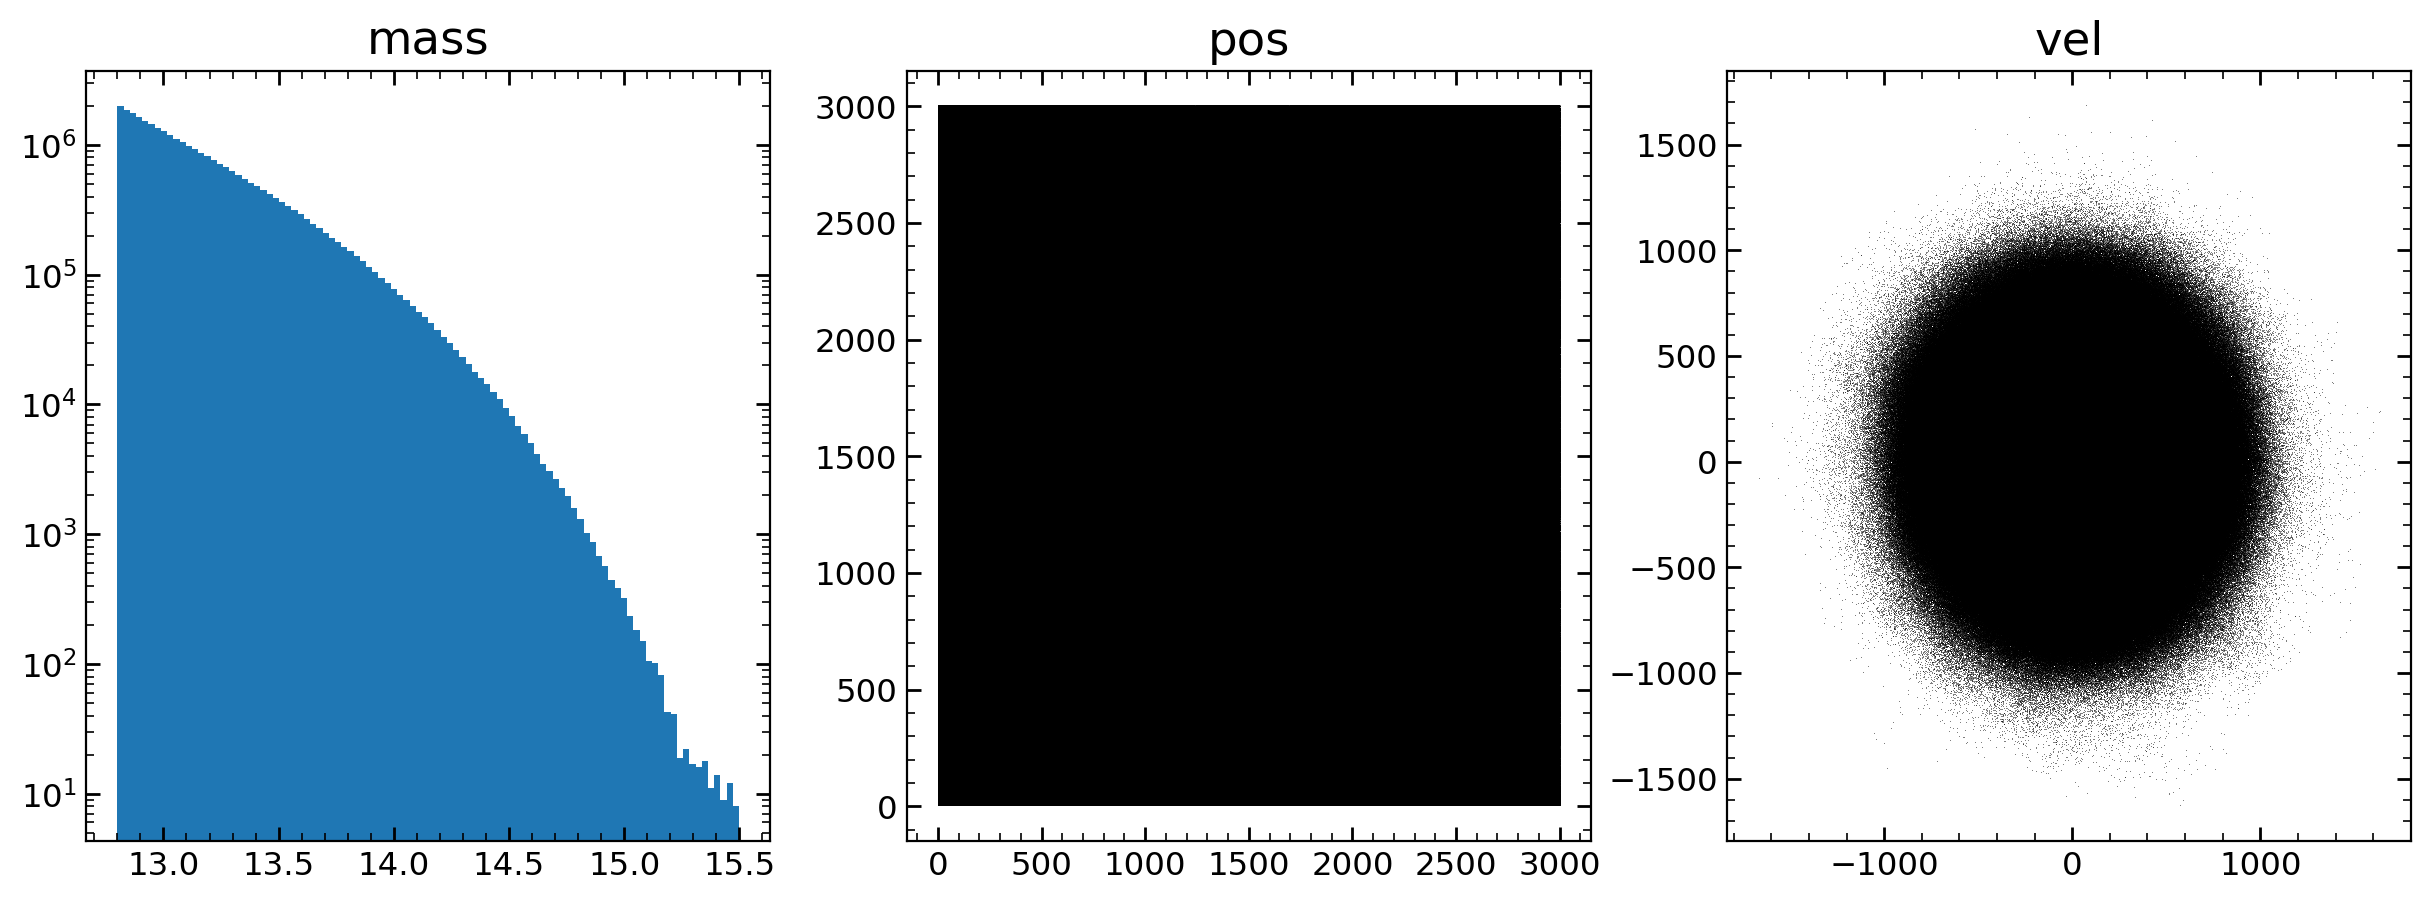

In [12]:
# plot halos
file = 'halos.h5'
with h5py.File(join(suitepath, str(lhid), file), 'r') as f:
    a = list(f.keys())[0]
    hmass = f[a]['mass'][:]
    hpos = f[a]['pos'][:]
    hvel = f[a]['vel'][:]
    print(hmass.shape, hpos.shape, hvel.shape)
f, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].semilogy()
axs[0].hist(hmass, bins=100)
axs[0].set_title('mass')
axs[1].plot(hpos[:, 0], hpos[:, 1], 'k,', alpha=0.5)
axs[1].set_title('pos')
axs[2].plot(hvel[:, 0], hvel[:, 1], 'k,', alpha=0.5)
axs[2].set_title('vel');

(20335899, 3) (20335899, 3)


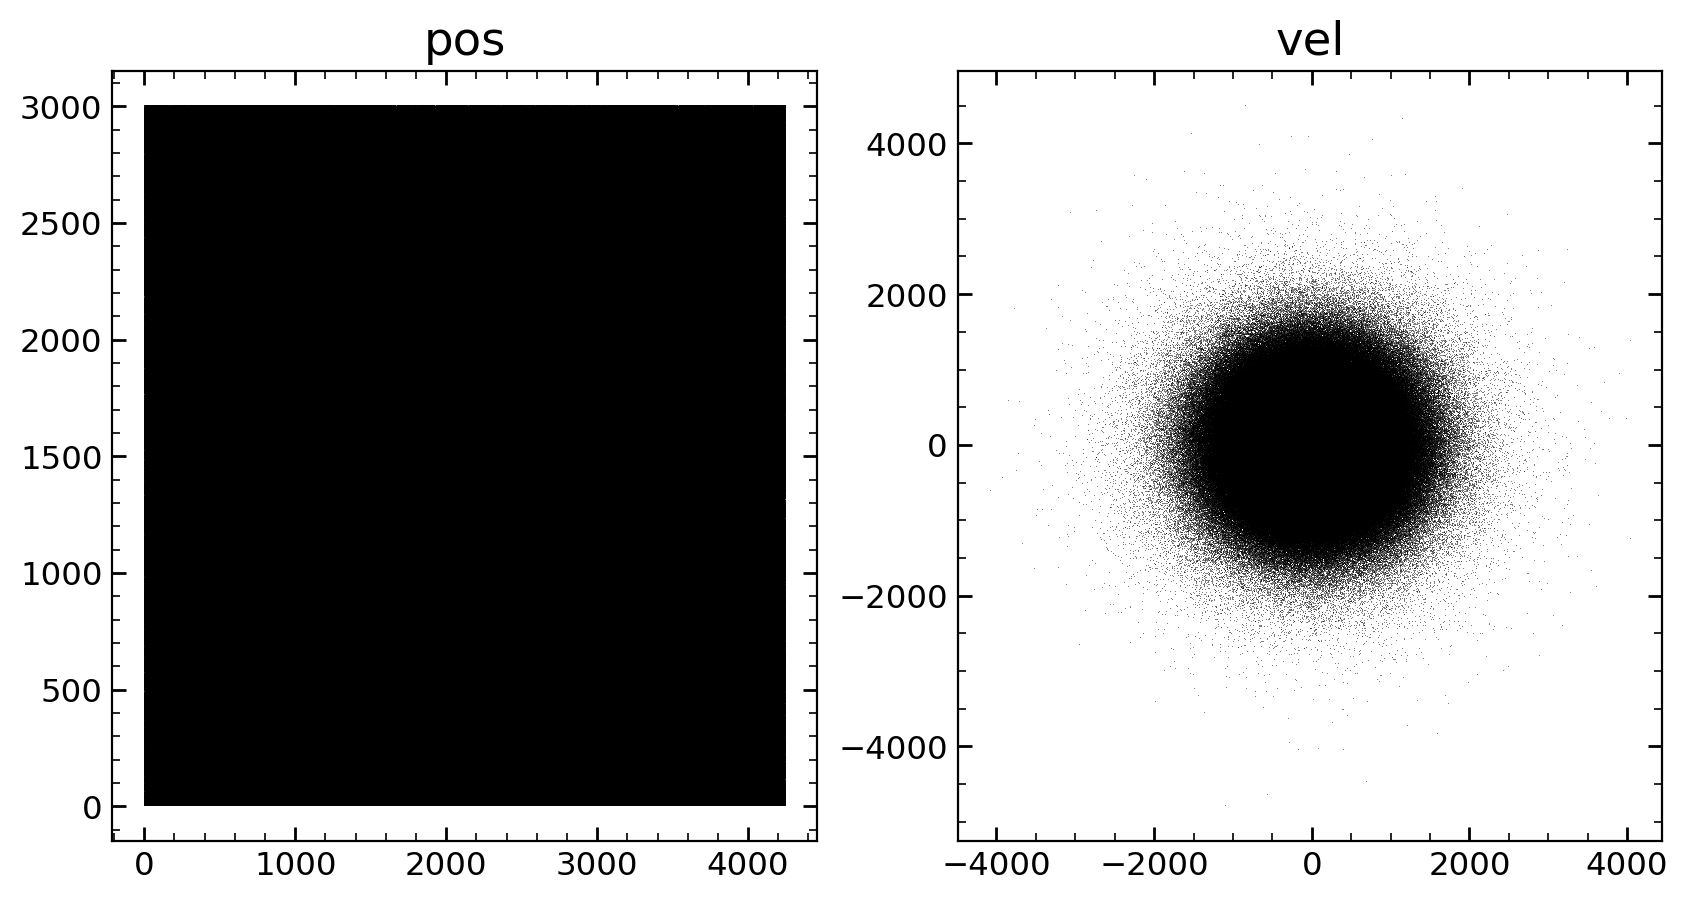

In [13]:
# plot galaxies
hod = 0
file=f'galaxies/hod{hod:03}.h5'
with h5py.File(join(suitepath, str(lhid), file), 'r') as f:
    a = list(f.keys())[0]
    gpos = f[a]['pos'][:]
    gvel = f[a]['vel'][:]
    print(gpos.shape, gvel.shape)
f, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].plot(gpos[:, 0], gpos[:, 1], 'k,', alpha=0.5)
axs[0].set_title('pos')
axs[1].plot(gvel[:, 0], gvel[:, 1], 'k,', alpha=0.5)
axs[1].set_title('vel');

(626187,) (626187,) (626187,)


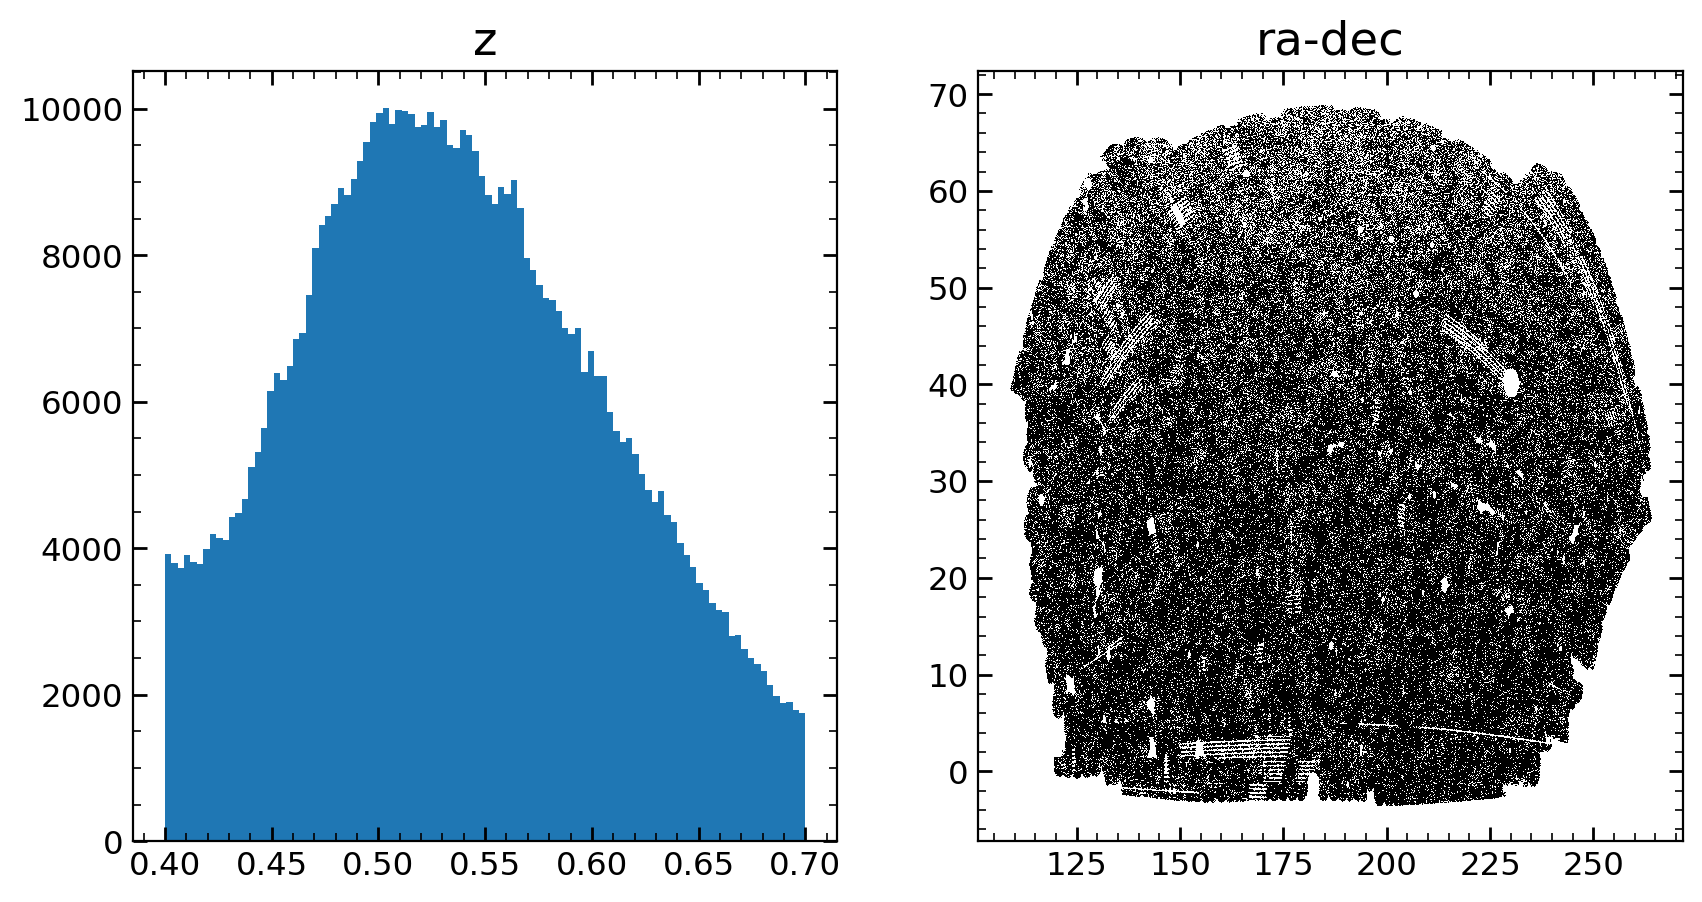

In [14]:
# plot lightcone
aug = 0
file = f'lightcone/hod{hod:03}_aug{aug:03}.h5'
with h5py.File(join(suitepath, str(lhid), file), 'r') as f:
    ra = f['ra'][...]
    dec = f['dec'][...]
    z = f['z'][...]
    print(ra.shape, dec.shape, z.shape)
f, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].hist(z, bins=100)
axs[0].set_title('z')
axs[1].plot(ra, dec, 'k,', alpha=1)
axs[1].set_title('ra-dec');

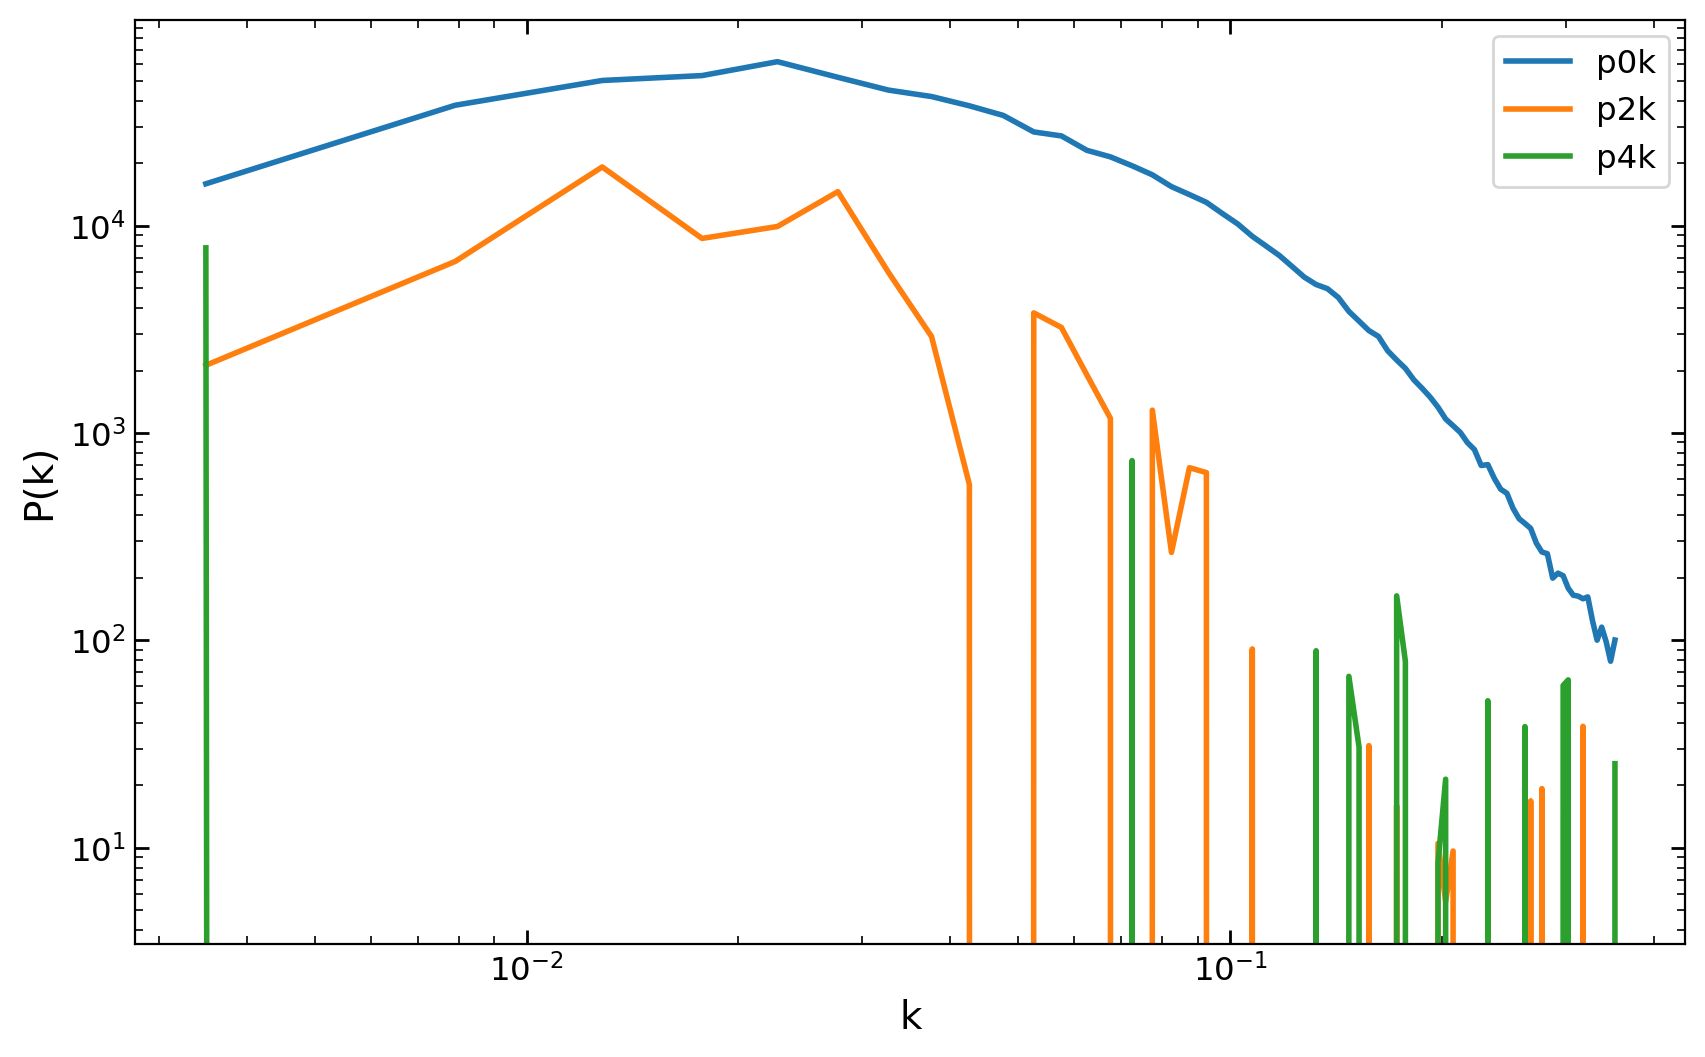

In [20]:
file = f'summary/hod{hod:03}_aug{aug:03}.h5'
with h5py.File(join(suitepath, str(lhid), file), 'r') as f:
    key = 'Pk' # list(f.keys())[0]
    k = f[key]['k'][...]
    p0k = f[key]['p0k'][...]
    p2k = f[key]['p2k'][...]
    p4k = f[key]['p4k'][...]

f, ax = plt.subplots()
ax.loglog(k, p0k, label='p0k')
ax.loglog(k, p2k, label='p2k')
ax.loglog(k, p4k, label='p4k')
ax.set(xlabel='k', ylabel='P(k)')
ax.legend();